In [1]:
import os
import time
import sys
import csv
import torch
import numpy as np
import pandas as pd
from src.ABBA import ABBA
from fABBA import fabba_model
from src import symbols_rnn 
from src import raw_rnn 
from util import dtw as DTW
import matplotlib.pyplot as plt



In [2]:
def sMAPE(A, F):
    return 100/len(A) * np.sum(2 * np.abs(A - F) / (np.abs(A) + np.abs(F)))

datadir = 'datasets/UCRArchive_2018'

In [3]:
split=0.1
tol=0.01
alpha=0.05
ws=10
patience=10
hidden_dim=36
num_rnn_layers=1
learning_rate=0.01


Dataset: DodgerLoopWeekend Lag: 10


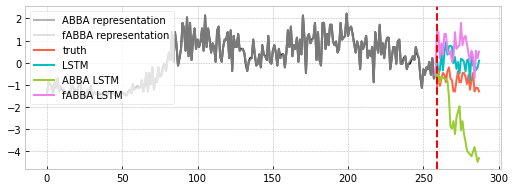

Dataset: Wine Lag: 10


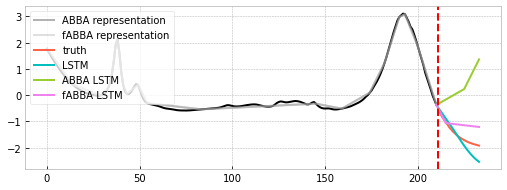

Dataset: Strawberry Lag: 10


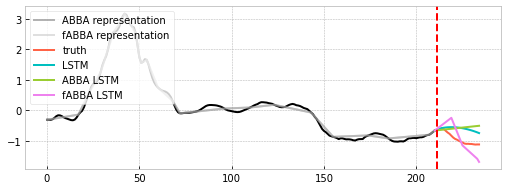

Dataset: ItalyPowerDemand Lag: 10
Time series too short
Dataset: PLAID Lag: 10


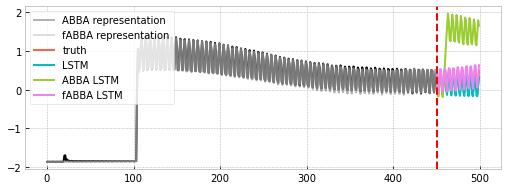

Dataset: BirdChicken Lag: 10
Time series too short
Dataset: ProximalPhalanxTW Lag: 10
Time series too short
Dataset: Symbols Lag: 10
Time series too short
Dataset: FiftyWords Lag: 10
Time series too short
Dataset: ChlorineConcentration Lag: 10


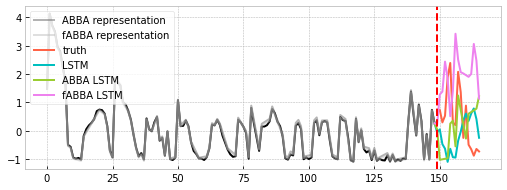

Dataset: Lightning2 Lag: 10


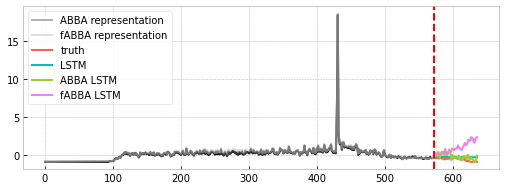

Dataset: UWaveGestureLibraryX Lag: 10
Time series too short
Dataset: FacesUCR Lag: 10


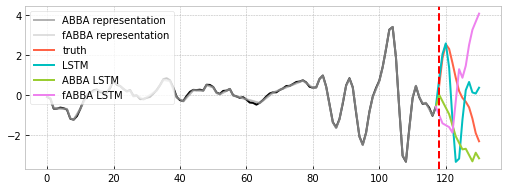

Dataset: Plane Lag: 10


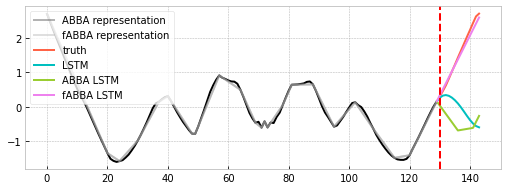

Dataset: RefrigerationDevices Lag: 10


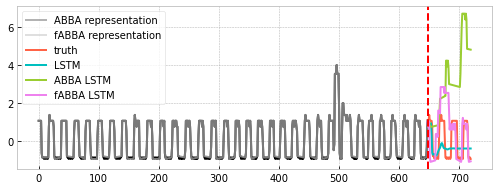

Dataset: Missing_value_and_variable_length_datasets_adjusted Lag: 10
[Errno 2] No such file or directory: 'datasets/UCRArchive_2018/Missing_value_and_variable_length_datasets_adjusted/Missing_value_and_variable_length_datasets_adjusted_TEST.tsv'
Dataset: ProximalPhalanxOutlineAgeGroup Lag: 10
Time series too short
Dataset: FordB Lag: 10


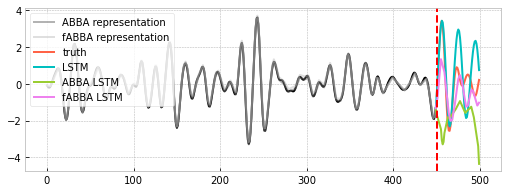

Dataset: Mallat Lag: 10


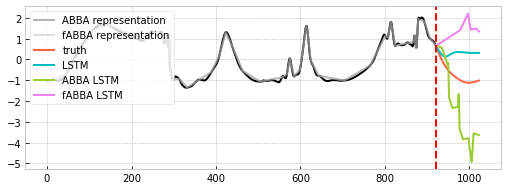

Dataset: SemgHandMovementCh2 Lag: 10


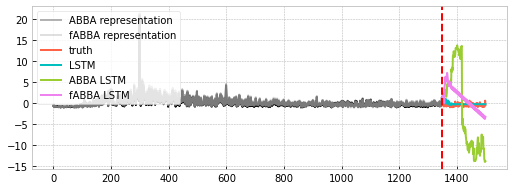

Dataset: Phoneme Lag: 10


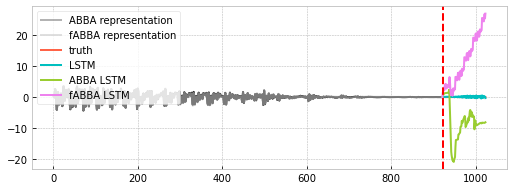

Dataset: UWaveGestureLibraryAll Lag: 10


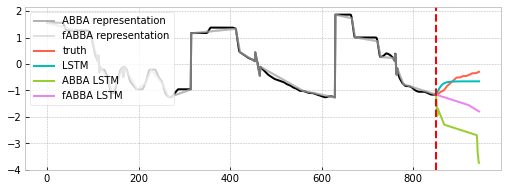

Dataset: Chinatown Lag: 10
Time series too short
Dataset: LargeKitchenAppliances Lag: 10
Time series too short
Dataset: Wafer Lag: 10
Time series too short
Dataset: AllGestureWiimoteZ Lag: 10
Time series too short
Dataset: HouseTwenty Lag: 10


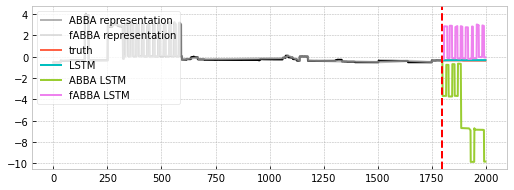

Dataset: ECGFiveDays Lag: 10


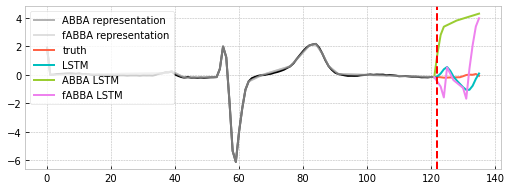

Dataset: Worms Lag: 10


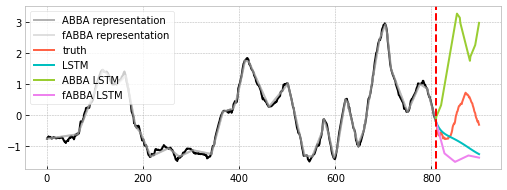

Dataset: BeetleFly Lag: 10


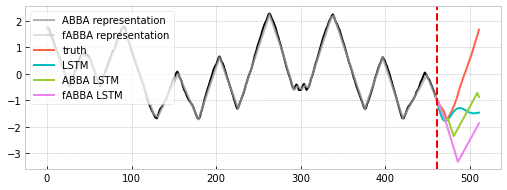

Dataset: ECG200 Lag: 10
Time series too short
Dataset: CinCECGTorso Lag: 10


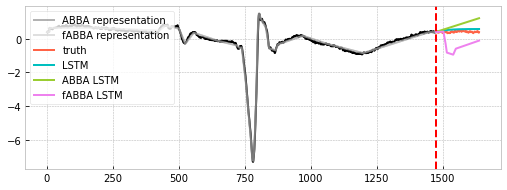

Dataset: MoteStrain Lag: 10
Time series too short
Dataset: MiddlePhalanxOutlineCorrect Lag: 10
Time series too short
Dataset: InsectEPGSmallTrain Lag: 10


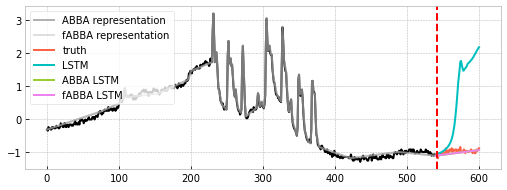

Dataset: ShakeGestureWiimoteZ Lag: 10


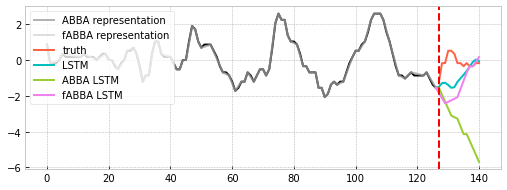

Dataset: SmallKitchenAppliances Lag: 10


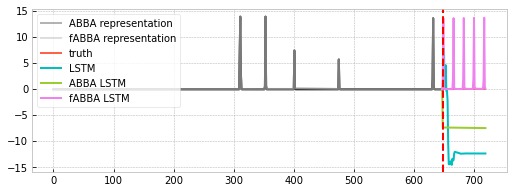

Dataset: MixedShapesSmallTrain Lag: 10
Time series too short
Dataset: ACSF1 Lag: 10


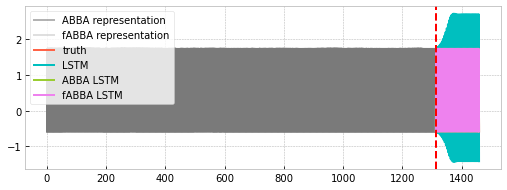

Dataset: Trace Lag: 10
Time series too short
Dataset: SyntheticControl Lag: 10
Time series too short
Dataset: CBF Lag: 10


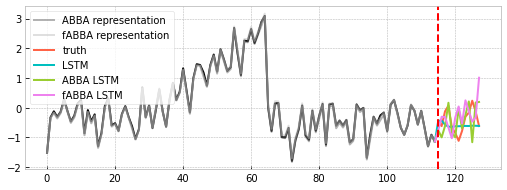

Dataset: MedicalImages Lag: 10
Time series too short
Dataset: ElectricDevices Lag: 10
Time series too short
Dataset: AllGestureWiimoteX Lag: 10


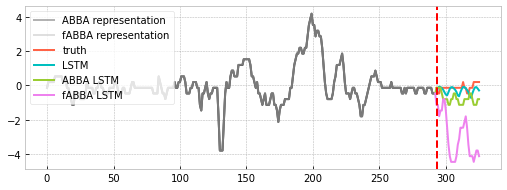

Dataset: Lightning7 Lag: 10


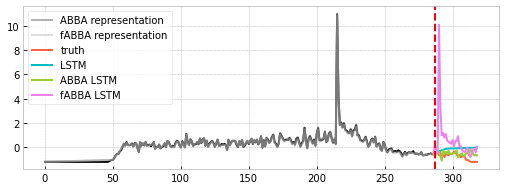

Dataset: GunPoint Lag: 10
Time series too short
Dataset: Fungi Lag: 10
Time series too short
Dataset: WordSynonyms Lag: 10
Time series too short
Dataset: CricketX Lag: 10


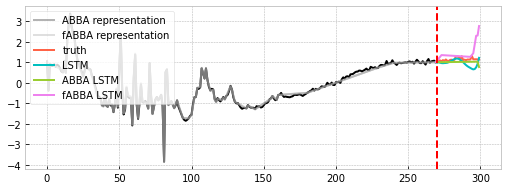

Dataset: ArrowHead Lag: 10
Time series too short
Dataset: TwoLeadECG Lag: 10
Time series too short
Dataset: FaceFour Lag: 10


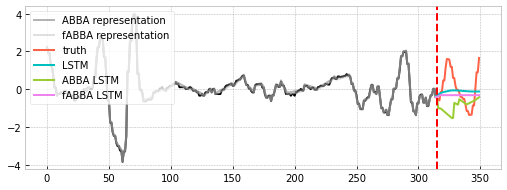

Dataset: FreezerRegularTrain Lag: 10
Time series too short
Dataset: Ham Lag: 10


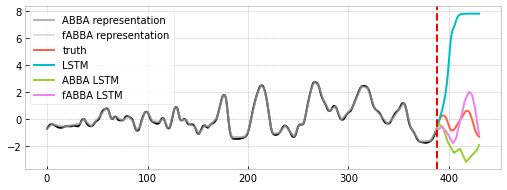

Dataset: ScreenType Lag: 10


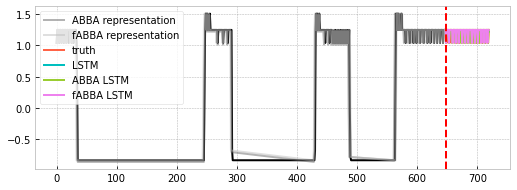

Dataset: MelbournePedestrian Lag: 10
Time series too short
Dataset: UWaveGestureLibraryZ Lag: 10
Time series too short
Dataset: InsectWingbeatSound Lag: 10


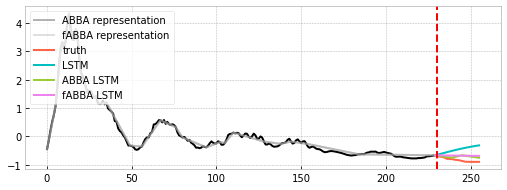

Dataset: FreezerSmallTrain Lag: 10
Time series too short
Dataset: Beef Lag: 10


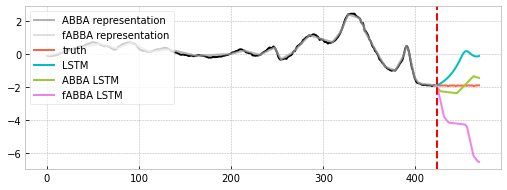

Dataset: NonInvasiveFetalECGThorax1 Lag: 10


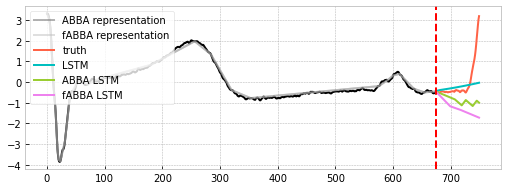

Dataset: Haptics Lag: 10


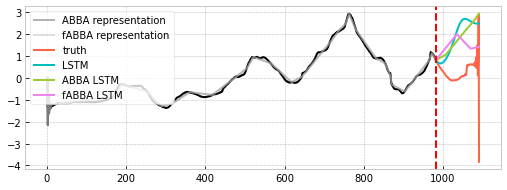

Dataset: SwedishLeaf Lag: 10


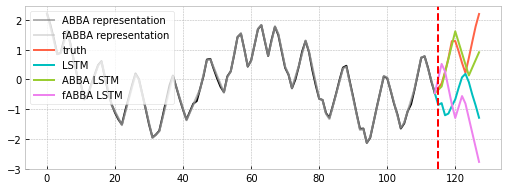

Dataset: GestureMidAirD3 Lag: 10
Time series too short
Dataset: GunPointAgeSpan Lag: 10
Time series too short
Dataset: Computers Lag: 10


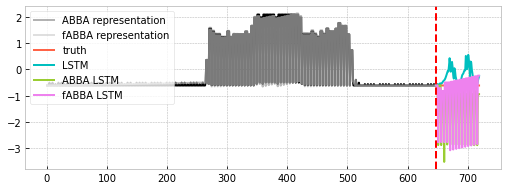

Dataset: MiddlePhalanxTW Lag: 10
Time series too short
Dataset: HandOutlines Lag: 10
Time series too short
Dataset: DistalPhalanxTW Lag: 10
Time series too short
Dataset: Rock Lag: 10
Time series too short
Dataset: GesturePebbleZ2 Lag: 10
Time series too short
Dataset: InsectEPGRegularTrain Lag: 10


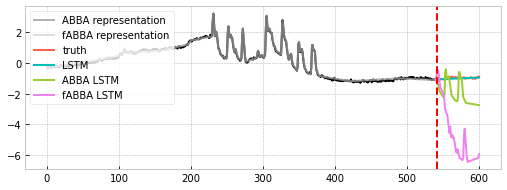

Dataset: Earthquakes Lag: 10


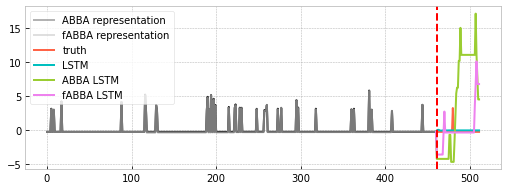

Dataset: ToeSegmentation2 Lag: 10


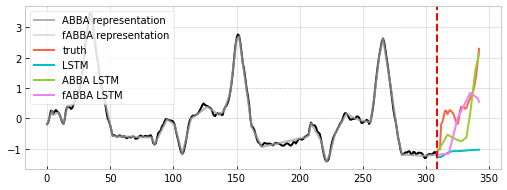

Dataset: GestureMidAirD1 Lag: 10
Time series too short
Dataset: AllGestureWiimoteY Lag: 10
Time series too short
Dataset: ECG5000 Lag: 10


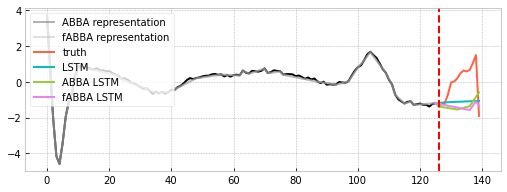

Dataset: SemgHandSubjectCh2 Lag: 10


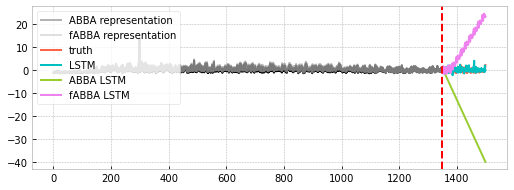

Dataset: FordA Lag: 10


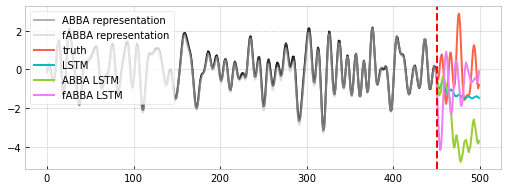

Dataset: Yoga Lag: 10
Time series too short
Dataset: PigAirwayPressure Lag: 10


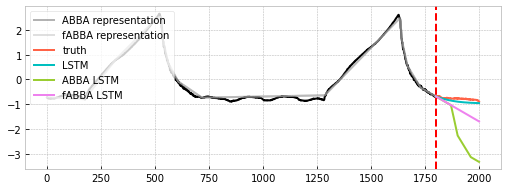

Dataset: SonyAIBORobotSurface1 Lag: 10
Time series too short
Dataset: FaceAll Lag: 10


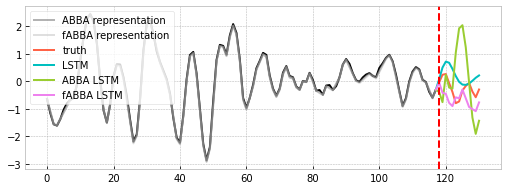

Dataset: DiatomSizeReduction Lag: 10
Time series too short
Dataset: PickupGestureWiimoteZ Lag: 10


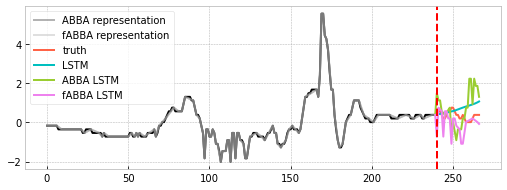

Dataset: ShapesAll Lag: 10
Time series too short
Dataset: ProximalPhalanxOutlineCorrect Lag: 10
Time series too short
Dataset: ShapeletSim Lag: 10


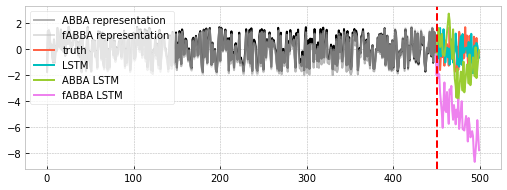

Dataset: SemgHandGenderCh2 Lag: 10


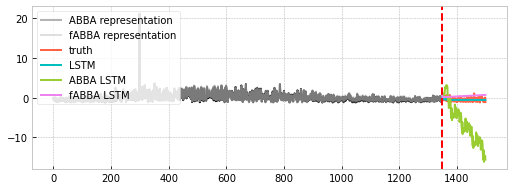

Dataset: DodgerLoopGame Lag: 10


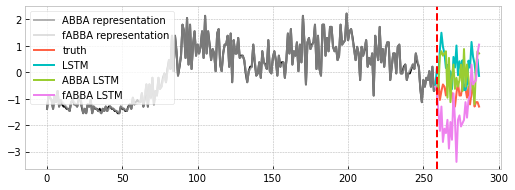

Dataset: OliveOil Lag: 10


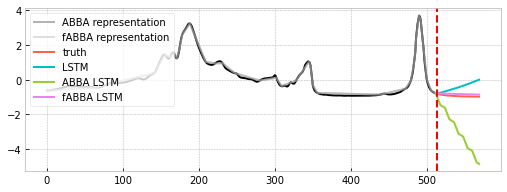

Dataset: EOGHorizontalSignal Lag: 10
Time series too short
Dataset: Adiac Lag: 10
Time series too short
Dataset: WormsTwoClass Lag: 10


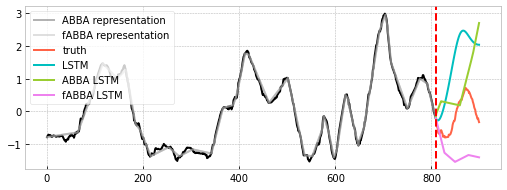

Dataset: UWaveGestureLibraryY Lag: 10
Time series too short
Dataset: MiddlePhalanxOutlineAgeGroup Lag: 10
Time series too short
Dataset: EOGVerticalSignal Lag: 10
Time series too short
Dataset: DistalPhalanxOutlineCorrect Lag: 10
Time series too short
Dataset: DodgerLoopDay Lag: 10


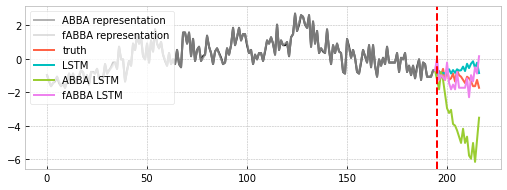

Dataset: ToeSegmentation1 Lag: 10


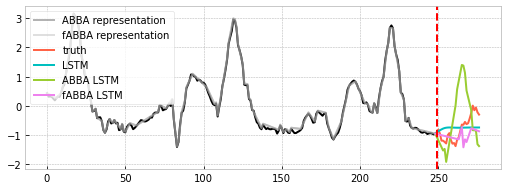

Dataset: PigCVP Lag: 10


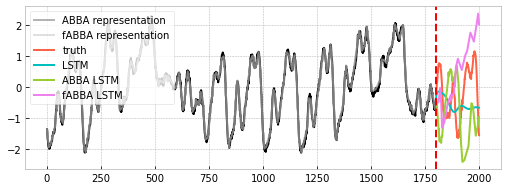

Dataset: SmoothSubspace Lag: 10
Time series too short
Dataset: NonInvasiveFetalECGThorax2 Lag: 10


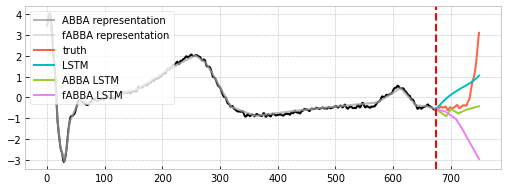

Dataset: GunPointMaleVersusFemale Lag: 10
Time series too short
Dataset: OSULeaf Lag: 10


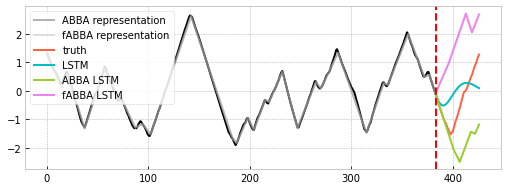

Dataset: UMD Lag: 10
Time series too short
Dataset: GestureMidAirD2 Lag: 10
Time series too short
Dataset: MixedShapesRegularTrain Lag: 10
Time series too short
Dataset: DistalPhalanxOutlineAgeGroup Lag: 10
Time series too short
Dataset: PhalangesOutlinesCorrect Lag: 10
Time series too short
Dataset: StarLightCurves Lag: 10
Time series too short
Dataset: PowerCons Lag: 10


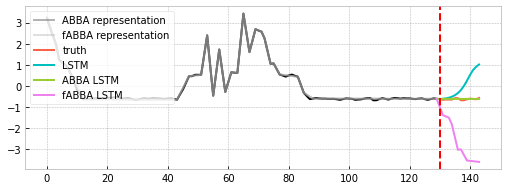

Dataset: Crop Lag: 10
Time series too short
Dataset: GesturePebbleZ1 Lag: 10


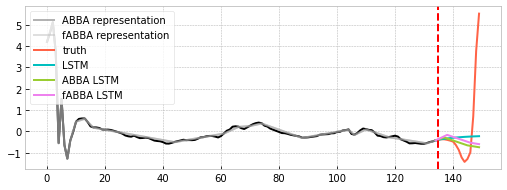

Dataset: InlineSkate Lag: 10
Time series too short
Dataset: CricketZ Lag: 10


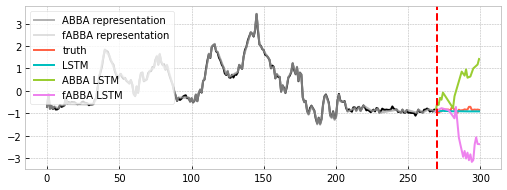

Dataset: SonyAIBORobotSurface2 Lag: 10
Time series too short
Dataset: Car Lag: 10
Time series too short
Dataset: CricketY Lag: 10


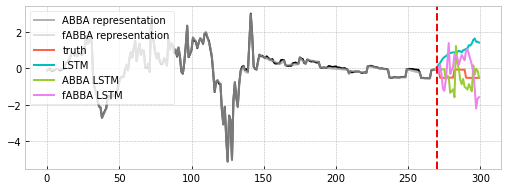

Dataset: Meat Lag: 10
Time series too short
Dataset: EthanolLevel Lag: 10
Time series too short
Dataset: TwoPatterns Lag: 10


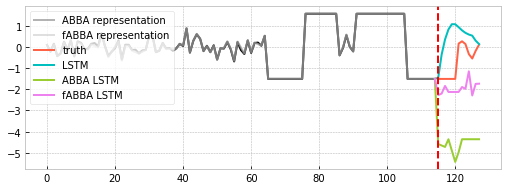

Dataset: Fish Lag: 10
Time series too short
Dataset: Herring Lag: 10
Time series too short
Dataset: BME Lag: 10
Time series too short
Dataset: Coffee Lag: 10


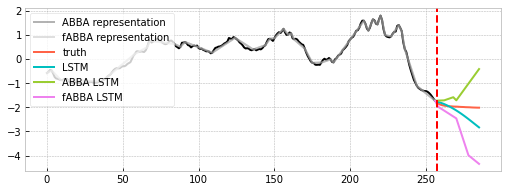

Dataset: PigArtPressure Lag: 10


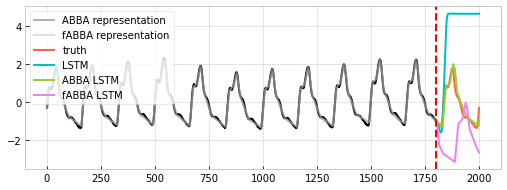

Dataset: GunPointOldVersusYoung Lag: 10
Time series too short
Dataset: DodgerLoopWeekend Lag: 10
list assignment index out of range
Dataset: PLAID Lag: 10
list assignment index out of range
Dataset: AllGestureWiimoteZ Lag: 10
list assignment index out of range
Dataset: ShakeGestureWiimoteZ Lag: 10
list assignment index out of range
Dataset: AllGestureWiimoteX Lag: 10
list assignment index out of range
Dataset: MelbournePedestrian Lag: 10
list assignment index out of range
Dataset: GestureMidAirD3 Lag: 10
list assignment index out of range
Dataset: GesturePebbleZ2 Lag: 10
list assignment index out of range
Dataset: GestureMidAirD1 Lag: 10
list assignment index out of range
Dataset: AllGestureWiimoteY Lag: 10
list assignment index out of range
Dataset: PickupGestureWiimoteZ Lag: 10
list assignment index out of range
Dataset: DodgerLoopGame Lag: 10
list assignment index out of range
Dataset: DodgerLoopDay Lag: 10
list assignment index out of range
Dataset: GestureMidAirD2 Lag: 10
list ass

In [4]:
datasets = [np.nan]*len(os.listdir(datadir))
lengths = [np.nan]*len(os.listdir(datadir))

fabba_transform_time = [np.nan]*len(os.listdir(datadir))
fabba_lstm_train_time = [np.nan]*len(os.listdir(datadir))
fabba_smape = [np.nan]*len(os.listdir(datadir))
fabba_dtw = [np.nan]*len(os.listdir(datadir))
fabba_euclid = [np.nan]*len(os.listdir(datadir))
fabba_diff_dtw = [np.nan]*len(os.listdir(datadir))
fabba_diff_euclid = [np.nan]*len(os.listdir(datadir))

abba_transform_time = [np.nan]*len(os.listdir(datadir))
abba_lstm_train_time = [np.nan]*len(os.listdir(datadir))
abba_smape = [np.nan]*len(os.listdir(datadir))
abba_dtw = [np.nan]*len(os.listdir(datadir))
abba_euclid = [np.nan]*len(os.listdir(datadir))
abba_diff_dtw = [np.nan]*len(os.listdir(datadir))
abba_diff_euclid = [np.nan]*len(os.listdir(datadir))

raw_lstm_train_time = [np.nan]*len(os.listdir(datadir))
raw_smape = [np.nan]*len(os.listdir(datadir))
raw_dtw = [np.nan]*len(os.listdir(datadir))
raw_euclid = [np.nan]*len(os.listdir(datadir))
raw_diff_dtw = [np.nan]*len(os.listdir(datadir))
raw_diff_euclid = [np.nan]*len(os.listdir(datadir))

plt.style.use('bmh')


# Run through dataset
random_seed = 0
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


idx = -1
for root, dirs, files in os.walk(datadir):
    if dirs != []:
        for dataset in dirs:
            try:
                idx = idx + 1
                print('Dataset:', dataset, 'Lag:', ws)
                # if os.path.isfile('results/lstm_plots/' + dataset + '_' + str(ws) + '.pdf'):
                #     raise RuntimeError('Already complete.')
                datasets[idx] = dataset
                
                # Import time series
                with open(datadir+'/'+dataset+'/'+dataset+'_TEST.tsv') as tsvfile:
                    tsvfile = csv.reader(tsvfile, delimiter='\t')
                    col = next(tsvfile)
                    ts = [float(i) for i in col]

                # remove class information
                ts = np.array(ts[1:])
                # remove NaN from time series
                ts = ts[~np.isnan(ts)]

                # Normalise time series
                ts -= np.mean(ts)
                ts /= np.std(ts)
                lengths[idx] = len(ts)
                
                fcast_len = int(round(split*len(ts)))
                train = ts[:-fcast_len]
                test = ts[-fcast_len:]

                # ------------------------------ fABBA --------------------------------
                # Build fABBA constructor
                st_fabba_t = time.time() # first-stage time
                fabba = fabba_model(tol=tol, alpha=alpha, sorting='2-norm', scl=1, verbose=0)
                string_fabba = fabba.fit_transform(train)            # string representation of the time series
                et_fabba_t = time.time() - st_fabba_t

                fabba_numerical = fabba.inverse_transform(string_fabba, train[0]) # numerical time series reconstruction

                if len(train) < 100:
                    raise RuntimeError('Time series too short')
                if len(string_fabba) < 20:
                    raise RuntimeError('Time series too short')

                segment_st_fabba, segment_ed_fabba = len(fabba_numerical), len(fabba_numerical)+len(test)

                # LSTM model with fABBA
                st_fabba = time.time() 
                new_string = symbols_rnn.fit_predict(string_fabba, ws=ws, step=len(test), test_rate=(1, 0, 0), 
                    patience=patience, hidden_dim=hidden_dim, num_rnn_layers=num_rnn_layers, learning_rate=learning_rate,
                    num_epoch=100, variant='LSTM', return_series=False, verbose=0)
                et_fabba = time.time()

                st_fabba_t = time.time() # second-stage time
                forecast_fabba = np.array(fabba.inverse_transform(string_fabba+new_string, ts[0])
                                    )[segment_st_fabba:segment_ed_fabba] # numerical time series reconstruction
                et_fabba_t = et_fabba_t + time.time() - st_fabba_t

                fabba_transform_time[idx] = et_fabba_t
                fabba_lstm_train_time[idx] = et_fabba - st_fabba
                fabba_smape[idx] = sMAPE(test, forecast_fabba) 
                fabba_dtw[idx] = DTW(test, forecast_fabba)
                fabba_euclid[idx] = np.linalg.norm(test - forecast_fabba)
                fabba_diff_dtw[idx]  = DTW(np.diff(test), np.diff(forecast_fabba))
                fabba_diff_euclid[idx] = np.linalg.norm(np.diff(test)-np.diff(forecast_fabba))

                # ------------------------------ ABBA --------------------------------
                # Build ABBA constructor: Ensure the same distinct symbols used in fABBA
                st_abba_t = time.time() # first-stage time
                abba = ABBA(tol=tol, min_k=len(set(string_fabba)), max_k=len(set(string_fabba)), scl=1, verbose=0)
                string_abba, abba_centers = abba.transform(train)
                et_abba_t = time.time() - st_abba_t

                abba_numerical = abba.inverse_transform(string_abba, abba_centers, train[0])
                segment_st_abba, segment_ed_abba = len(abba_numerical), len(abba_numerical)+len(test)

                # LSTM model with ABBA
                st_abba = time.time()
                new_string = symbols_rnn.fit_predict(string_abba, ws=ws, step=len(test), test_rate=(1, 0, 0), 
                    patience=patience, hidden_dim=hidden_dim, num_rnn_layers=num_rnn_layers, learning_rate=learning_rate,
                    num_epoch=100, variant='LSTM', return_series=False, verbose=0)
                et_abba = time.time()

                st_abba_t = time.time() # second-stage time
                forecast_abba = np.array(abba.inverse_transform(string_abba+new_string, abba_centers, ts[0])
                        )[segment_st_abba:segment_ed_abba] # numerical time series reconstruction
                et_abba_t = et_abba_t + time.time() - st_abba_t

                abba_transform_time[idx] = et_abba_t
                abba_lstm_train_time[idx] = et_abba - st_abba
                abba_smape[idx] = sMAPE(test, forecast_abba) 
                abba_dtw[idx] = DTW(test, forecast_abba)
                abba_euclid[idx] = np.linalg.norm(test - forecast_abba)
                abba_diff_dtw[idx]  = DTW(np.diff(test), np.diff(forecast_abba))
                abba_diff_euclid[idx] = np.linalg.norm(np.diff(test)-np.diff(forecast_abba))


                # ------------------------------  Raw --------------------------------
                # LSTM model with raw input
                st_raw = time.time()
                forecast_raw = raw_rnn.fit_predict(train, ws=ws, step=len(test), test_rate=(1, 0, 0), 
                    patience=patience, hidden_dim=hidden_dim, num_rnn_layers=num_rnn_layers, learning_rate=learning_rate,
                    num_epoch=100, variant='GRU', verbose=0)[len(train):len(train)+len(test)]
                et_raw = time.time() - st_raw

                raw_lstm_train_time[idx] = et_raw
                raw_smape[idx] = sMAPE(test, forecast_raw) 
                raw_dtw[idx] = DTW(test, forecast_raw)
                raw_euclid[idx] = np.linalg.norm(test - forecast_raw)
                raw_diff_dtw[idx]  = DTW(np.diff(test), np.diff(forecast_raw))
                raw_diff_euclid[idx] = np.linalg.norm(np.diff(test)-np.diff(forecast_raw))

                # Produce plots
                plt.figure(figsize=(8, 3))
                plt.rcParams['axes.facecolor'] = 'white'
                
                plt.subplots_adjust(left=0.125, bottom=None, right=0.95, top=None, wspace=None, hspace=None)
                plt.plot(train, 'k')
                plt.plot(abba_numerical, 'dimgray', alpha=0.5, label='ABBA representation')
                plt.plot(fabba_numerical, 'silver', alpha=0.5, label='fABBA representation')
                plt.plot(np.arange(len(train), len(train)+len(test), 1), test, 'tomato', label='truth')
                plt.plot(np.arange(len(train)-1, len(train)+len(test), 1), [train[-1]]+forecast_raw.tolist(), 'c', label='LSTM')
                plt.plot(np.arange(len(train)-1, len(train)+len(test), 1), [train[-1]]+forecast_abba.tolist(), 'yellowgreen', label='ABBA LSTM')
                plt.plot(np.arange(len(train)-1, len(train)+len(test), 1), [train[-1]]+forecast_fabba.tolist(), 'violet', label='fABBA LSTM')
                
                plt.axvline(x=len(train), c='r', linestyle='--')
                plt.legend(loc='upper left')
                plt.savefig('results/lstm_plots/' + dataset + '_' + str(ws) + '.pdf')
                plt.show()
                plt.close()
                
            except Exception as e:
                print(e)


In [5]:
header = ['dataset', 'length', 
          'ABBA_Time', 'ABBA_Train_Time', 'ABBA_sMAPE','ABBA_DTW',  'ABBA_Euclidean', 'ABBA_diff_DTW', 'ABBA_diff_Euclidean', 
          'fABBA_Time', 'fABBA_Train_Time', 'fABBA_sMAPE', 'fABBA_Euclidean', 'fABBA_diff_Euclidean', 'fABBA_DTW', 'fABBA_diff_DTW',
          'raw_Train_Time', 'raw_sMAPE', 'raw_Euclidean', 'raw_diff_Euclidean', 'raw_DTW', 'raw_diff_DTW'
         ]

metric = pd.DataFrame(columns=header)

In [6]:
metric['dataset'] = datasets
metric['length'] = lengths
metric['ABBA_Time'] = abba_transform_time
metric['ABBA_Train_Time'] = abba_lstm_train_time
metric['ABBA_sMAPE'] = abba_smape
metric['ABBA_DTW'] = abba_dtw
metric['ABBA_Euclidean'] = abba_euclid
metric['ABBA_diff_DTW'] = abba_diff_dtw
metric['ABBA_diff_Euclidean'] = abba_diff_euclid

metric['fABBA_Time'] = fabba_transform_time
metric['fABBA_Train_Time'] = fabba_lstm_train_time
metric['fABBA_sMAPE'] = fabba_smape
metric['fABBA_DTW'] = fabba_dtw
metric['fABBA_Euclidean'] = fabba_euclid
metric['fABBA_diff_DTW'] = fabba_diff_dtw
metric['fABBA_diff_Euclidean'] = fabba_diff_euclid


metric['raw_Train_Time'] = raw_lstm_train_time
metric['raw_sMAPE'] = raw_smape
metric['raw_DTW'] = raw_dtw
metric['raw_Euclidean'] = raw_euclid
metric['raw_diff_DTW'] = raw_diff_dtw
metric['rwa_diff_Euclidean'] = raw_diff_euclid

In [7]:
metric.to_csv('results/LSTM_comp.csv', index=False)